<a href="https://colab.research.google.com/github/timow256/timow256/blob/main/E_Commerce_Shipping_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Made By: Timotius William Wuisang**

In [ ]:
# Import Library-library yang dibutuhkan
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

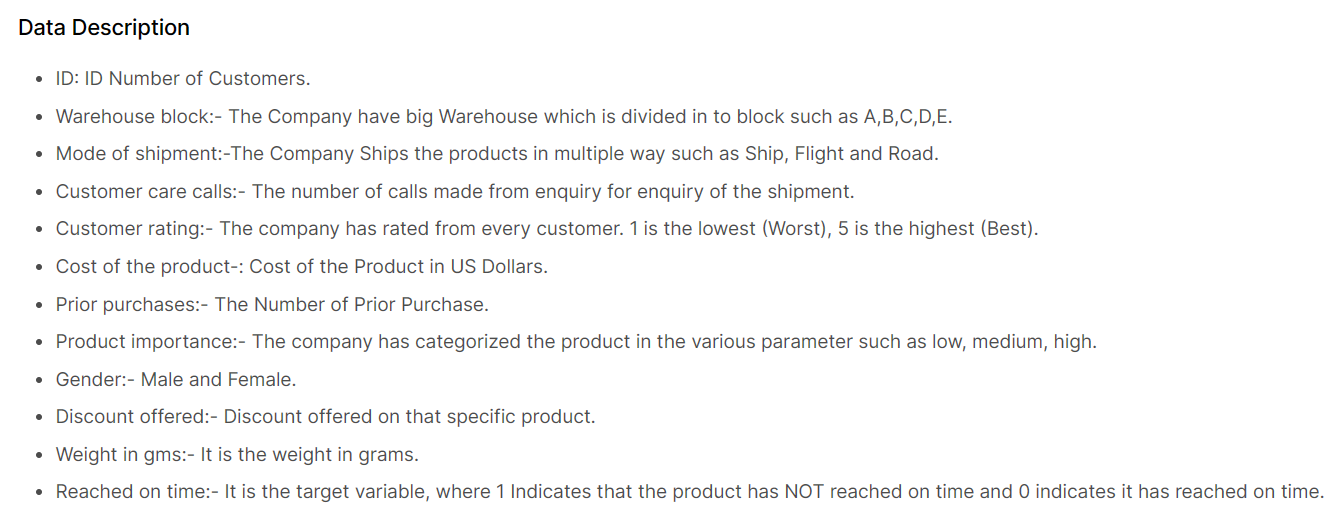

## **Pertanyaan**
### 1. Berapa persentase barang yang datang tepat waktu?
### 2. Bagaimana pengaruh blok warehouse (A, B, C, D, E) terhadap ketepatan waktu pengiriman?
### 3. Apakah ada perbedaan signifikan dalam moda pengiriman (Ship, Flight, Road) dan waktu pengiriman produk?
### 4. Bagaimana hubungan antara jumlah panggilan ke layanan pelanggan dan ketepatan waktu pengiriman?
### 5. Apakah terdapat hubungan antara rating pelanggan terhadap ketepatan waktu pengiriman?
### 6. Apakah terdapat korelasi antara biaya produk dan kemungkinan produk sampai tepat waktu?
### 7. Apakah jumlah pembelian sebelumnya berhubungan dengan ketepatan waktu pengiriman?
### 8. Apakah tingkat pentingnya suatu produk memengaruhi ketepatan waktu pengiriman?
### 9. Apakah Gender memengaruhi ketepatan waktu pengiriman?
### 10. Bagaimana hubungan antara diskon yang ditawarkan dan ketepatan waktu pengiriman?
### 11. Apakah berat produk berpengaruh pada kemungkinan produk sampai tepat waktu?



In [ ]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# Menampilkan ukuran data
df.shape

(10999, 12)

In [ ]:
# Menampilkan nama kolom
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [ ]:
# Menampilkan tipe data
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
# Menampilkan deskripsi statistik data
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
# Menampilkan jumlah data dengan null values
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
# Mengubah label 0 dengan Yes (On time) dan label 1 dengan No (Not on time)
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].replace({0:'Yes', 1:'No'})

In [ ]:
Q1 = df['Weight_in_gms'].quantile(0.25)
Q3 = df['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df = df[(df['Weight_in_gms'] >= lower_bound) & (df['Weight_in_gms'] <= upper_bound)]

### 1. Berapa persentase barang yang datang tepat waktu?

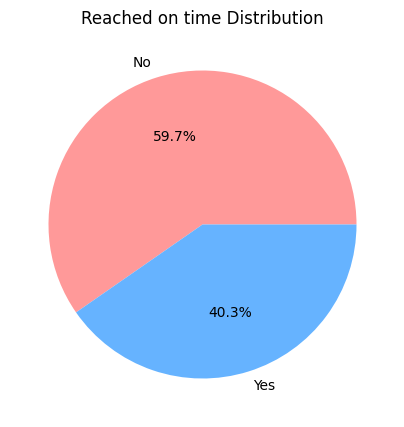

In [ ]:
ontime_counts = df['Reached.on.Time_Y.N'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(ontime_counts, labels=ontime_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Reached on time Distribution')
plt.show()

Tampak perbandingan barang sampai tidak tepat waktu lebih banyak. Hampir 60% dari keseluruhan data menunjukkan bahwa barang tidak sampai tepat waktu.

### 2. Bagaimana pengaruh blok warehouse (A, B, C, D, E) terhadap ketepatan waktu pengiriman?

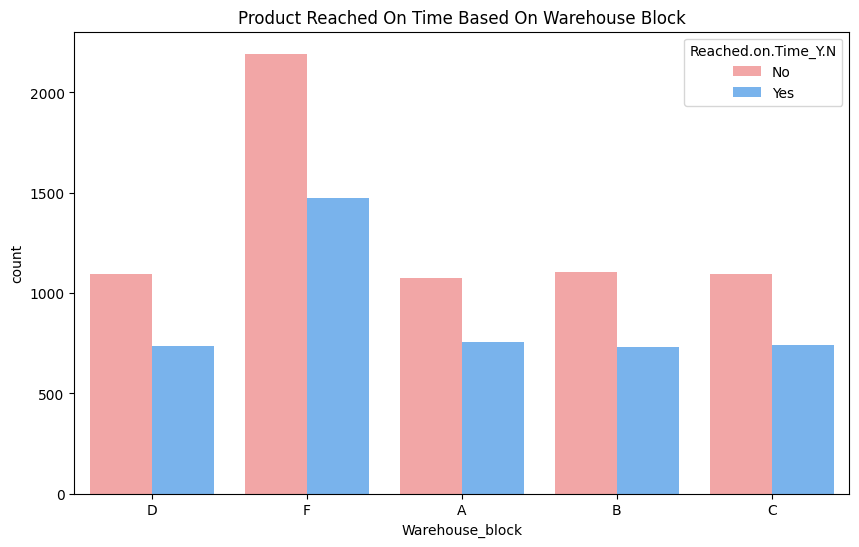

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df, palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Warehouse Block')
plt.show()

Visualisasi di atas masih sedikit berantakan dan ditemukan bahwa blok warehouse F seharusnya diganti dengan E, sehingga perlu sedikit pengaturan.

In [ ]:
# Mengganti nama blok warehouse F menjadi E
df['Warehouse_block'] = df['Warehouse_block'].replace({'F':'E'})

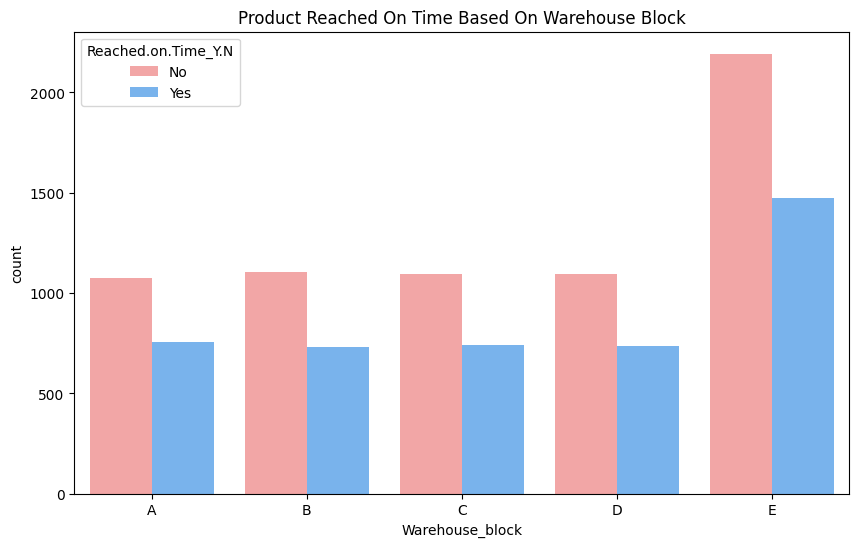

In [ ]:
# Menampilkan visualisasi sesuai urutan dari A sampai E
plt.figure(figsize=(10, 6))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df, palette=['#ff9999', '#66b3ff'], order=['A', 'B', 'C', 'D', 'E'])

plt.title('Product Reached On Time Based On Warehouse Block')
plt.show()

Terlihat bahwa tidak ada pengaruh signifikan antara blok warehouse dan ketepatan waktu pengiriman. Semua blok menunjukkan bahwa lebih banyak produk yang sampai tidak tepat waktu.

### 3. Apakah ada perbedaan signifikan dalam moda pengiriman (Ship, Flight, Road) dan waktu pengiriman produk?

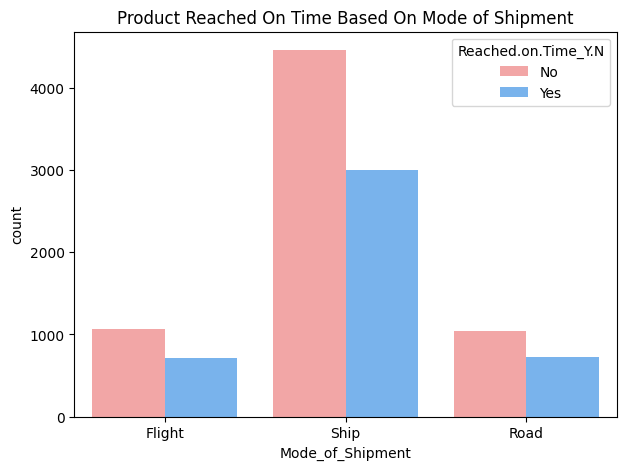

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Mode of Shipment')
plt.show()

Berdasarkan moda pengirimannya, terlihat tidak ada perbedaan yang signifikan dimana semua moda pengiriman cenderung tidak tepat waktu. Meski begitu, moda pengiriman menggunakan kapal terlihat sedikit lebih banyak mengalami ketidaktepatan waktu dibanding moda pengiriman yang lain.

### 4. Bagaimana hubungan antara jumlah panggilan ke layanan pelanggan dan ketepatan waktu pengiriman?

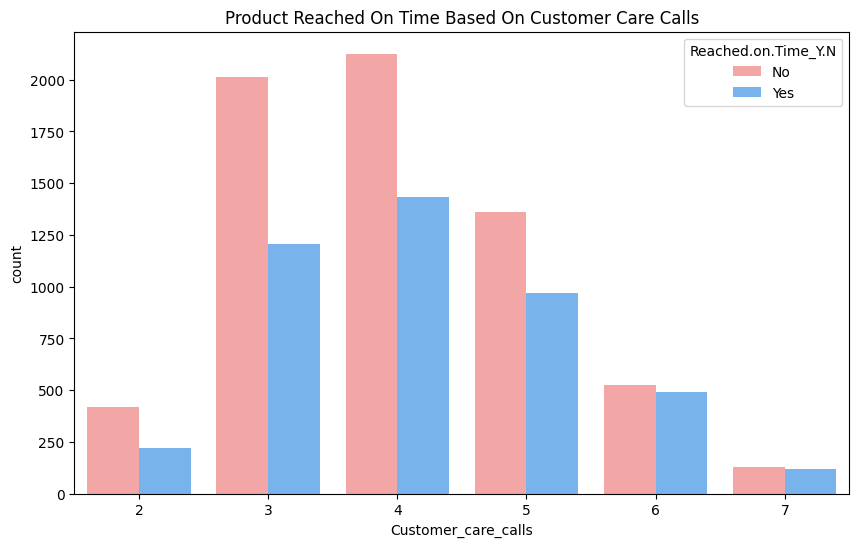

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df, palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Customer Care Calls')
plt.show()

Terlihat jumlah panggilan tidak memiliki hubungan erat dengan ketepatan waktu pengiriman. Hanya saja ketika pelanggan menelepon lebih dari 5 kali, pengiriman cenderung lebih tepat waktu.

### 5. Apakah terdapat hubungan antara rating pelanggan terhadap ketepatan waktu pengiriman?

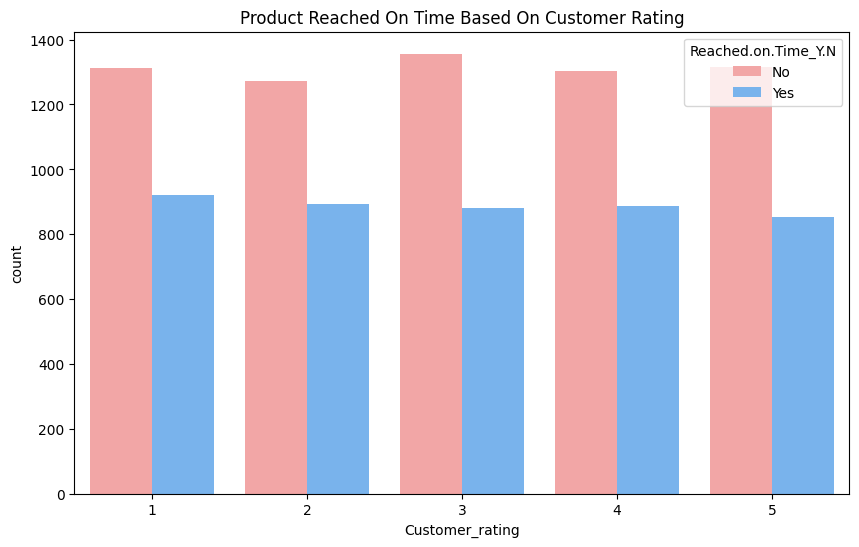

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N', data=df, palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Customer Rating')
plt.show()

Tidak terlihat ada hubungan antara rating pelanggan terhadap ketepatan waktu pengiriman.

### 6. Apakah terdapat korelasi antara biaya produk dan kemungkinan produk sampai tepat waktu?

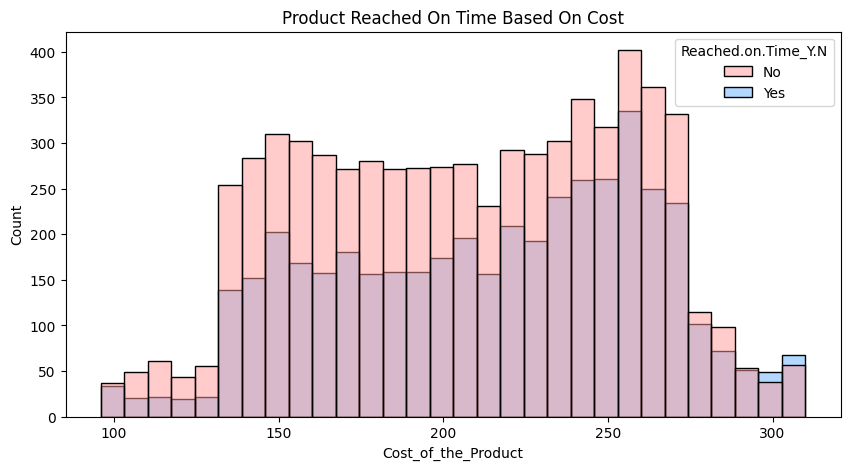

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Cost_of_the_Product', hue='Reached.on.Time_Y.N', palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Cost')
plt.show()

Terlihat hampir dalam semua rentang harga, produk cenderung sampai tidak tepat waktu. Namun ketika harga berada dalam rentang kurang lebih 300 USD, lebih banyak produk yang sampai tepat waktu.

### 7. Apakah jumlah pembelian sebelumnya berhubungan dengan ketepatan waktu pengiriman?

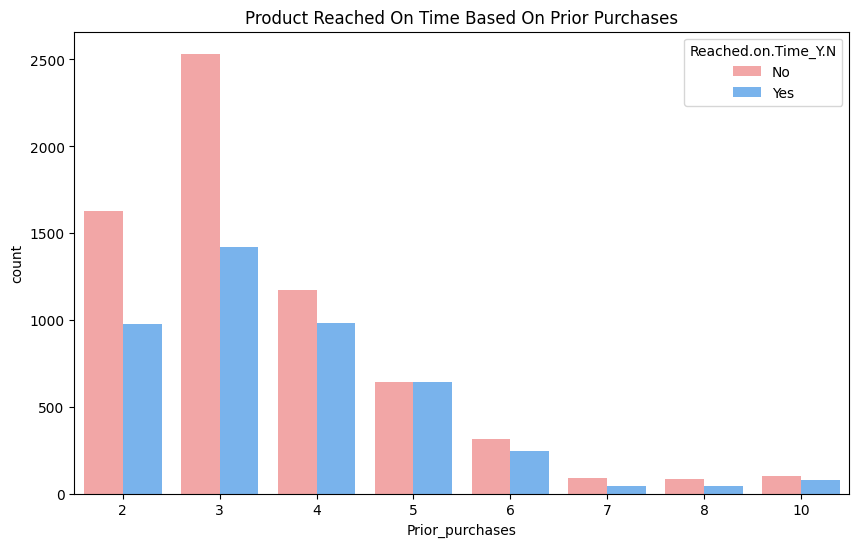

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Prior_purchases', hue='Reached.on.Time_Y.N', data=df, palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Prior Purchases')
plt.show()

Terlihat tidak ada hubungan yang signifikan. Namun, kebanyakan pelanggan yang sebelumnya baru melakukan pembelian terutama sebanyak 2-3 kali, cenderung menerima barang tidak tepat waktu.

### 8. Apakah tingkat pentingnya suatu produk memengaruhi ketepatan waktu pengiriman?

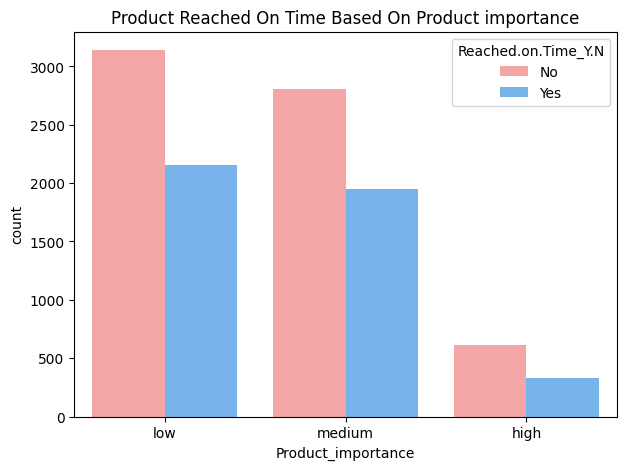

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df, palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Product importance')
plt.show()

Terlihat tidak terlihat pengaruh signifikan dari tingkat pentingnya suatu produk terhadap ketepatan waktu pengiriman. Semua tingkat menunjukkan lebih banyak barang yang sampai tidak tepat waktu.

### 9. Apakah Gender memengaruhi ketepatan waktu pengiriman?

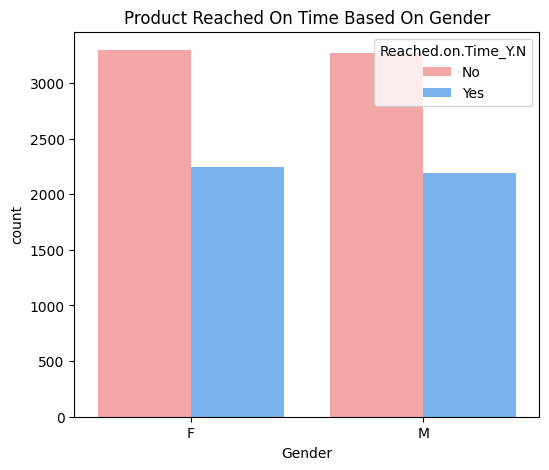

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=df, palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Gender')
plt.show()

Tidak terlihat ada pengaruh gender terhadap ketepatan waktu pengiriman.

### 10. Bagaimana hubungan antara diskon yang ditawarkan dan ketepatan waktu pengiriman?

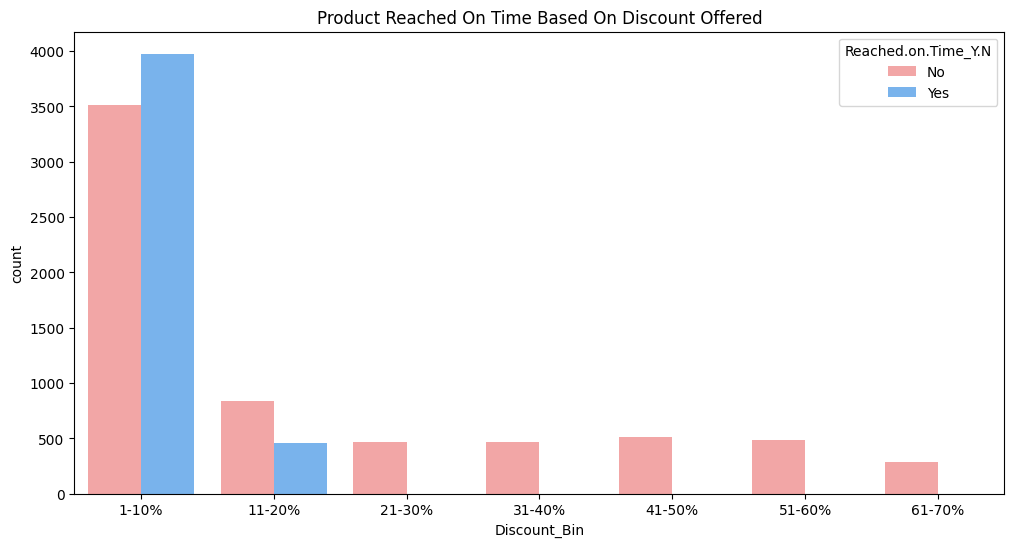

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['1-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%']
df['Discount_Bin'] = pd.cut(df['Discount_offered'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='Discount_Bin', hue='Reached.on.Time_Y.N', data=df, palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Discount Offered')
plt.show()

Terlihat bahwa terdapat hubungan antara diskon yang ditawarkan dengan ketepatan waktu pengiriman. Produk dengan diskon berkisar 0-10% cenderung sampai tepat waktu. Sedangkan, produk dengan diskon di atas 10%, lebih banyak yang tidak sampai tepat waktu.

### 11. Apakah berat produk berpengaruh pada kemungkinan produk sampai tepat waktu?

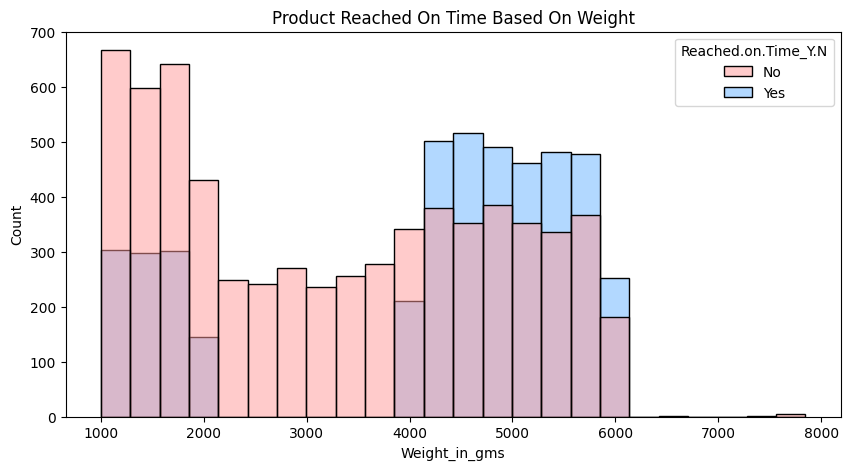

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Weight_in_gms', hue='Reached.on.Time_Y.N', palette=['#ff9999', '#66b3ff'])

plt.title('Product Reached On Time Based On Weight')
plt.show()

Terlihat bahwa produk dengan berat di bawah sekitar 4000 gram cenderung tidak dikirim tepat waktu, sedangkan produk dengan berat di atas 4000 gram cenderung sampai tepat waktu.

## Korelasi Pearson

<ipython-input-278-8fe1b33b6f58>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


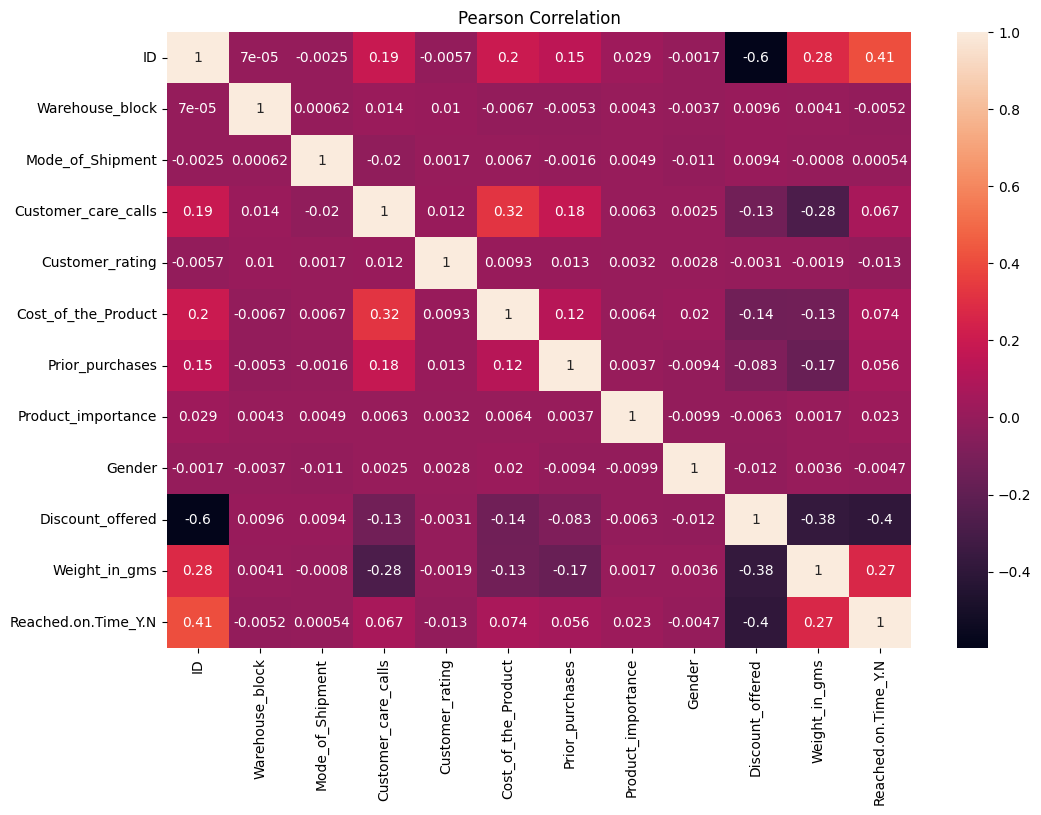

In [ ]:
# Mengencode kolom kategorikal agar dapat dilihat korelasinya juga
from sklearn.preprocessing import LabelEncoder
categ = df.select_dtypes(include = "object").columns

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

# Menampilkan heatmap korelasi Pearson
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Pearson Correlation")
plt.show()

## Kesimpulan
### Produk kemungkinan akan sampai tepat waktu jika:
1.   Pelanggan membeli produk dengan harga kurang lebih 300 USD
2.   Produk yang dibeli memiliki diskon tidak lebih dari 10%
3.   Pelanggan membeli produk dengan berat lebih dari 4000 gram

